# Data Exploration

In [2]:
# imports

import pandas as pd
import numpy as np
import pylab
import calendar
import seaborn as sns
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import cross_validation, grid_search, linear_model, metrics, pipeline, preprocessing
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

C:\Program Files\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
# read file

data = pd.read_csv("../train.csv")
d = pd.read_csv("../train.csv")

In [4]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


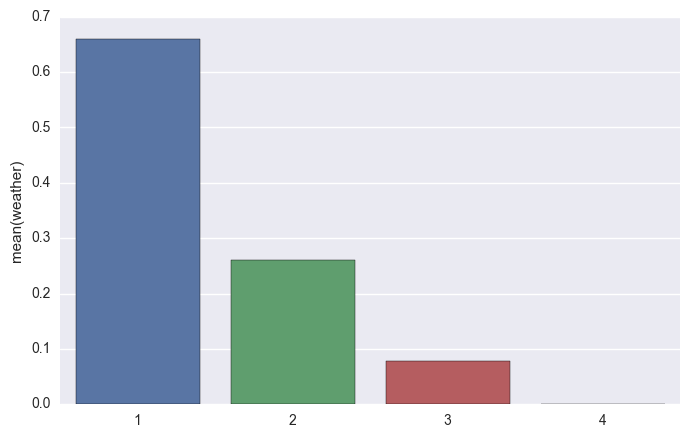

In [4]:
# data['weather'].value_counts().plot(kind='bar');

plt.figure(figsize=(8, 5))
sns.barplot(x = data['weather'].value_counts().index, y = data['weather'].value_counts(normalize = True));

We see that weather #1 ("Clear, Few clouds, Partly cloudy, Partly cloudy") accounts for more records than the remaining three weather types combined. 

In [5]:
# feature engineering

data.datetime = data.datetime.apply(pd.to_datetime)
data['month'] = data.datetime.apply(lambda x : x.month)
data['hour'] = data.datetime.apply(lambda x : x.hour)
data.head()

d['date'] = d.datetime.apply(lambda x : x.split()[0])
d['hour'] = d.datetime.apply(lambda x : x.split()[1].split(":")[0])
d['weekDay'] = d.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
d['month'] = d.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
d['season'] = d.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

# dropping unecessary fileds

# data  = data.drop(["datetime","atemp"],axis=1)

In [6]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4


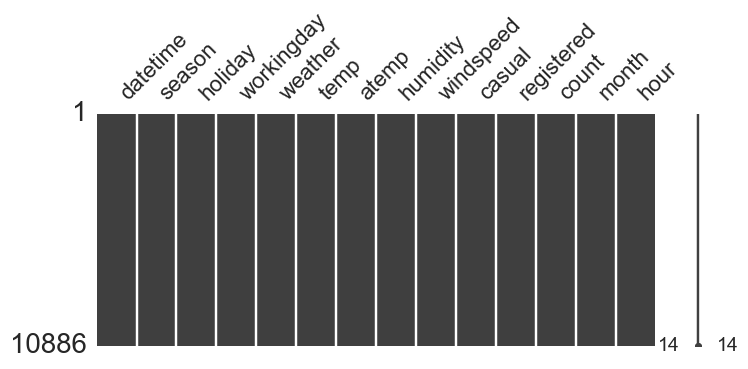

In [7]:
msno.matrix(data,figsize=(8,3))

We can see that each of the fourteen variables is essentially complete over time. No massive gaps in data to fill.

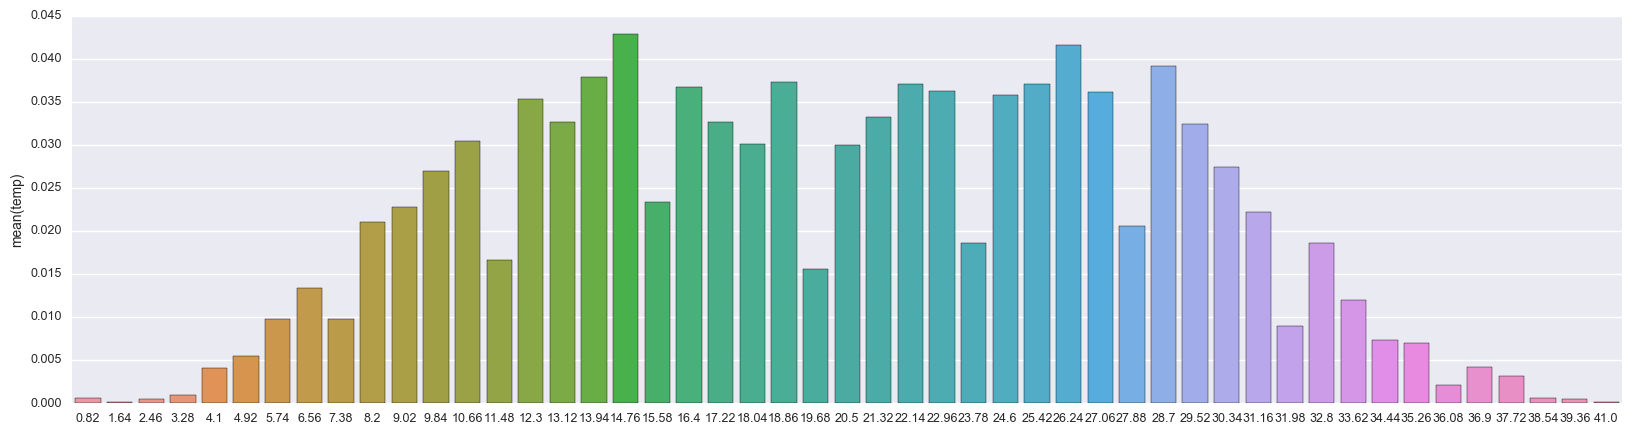

In [8]:
plt.figure(figsize=(20, 5))
sns.set(font_scale = 0.9)
sns.barplot(x = d['temp'].value_counts().index, y = d['temp'].sort_values(ascending = True).value_counts(normalize = True));

Temp shows a central tendency, somewhat normal distribution.

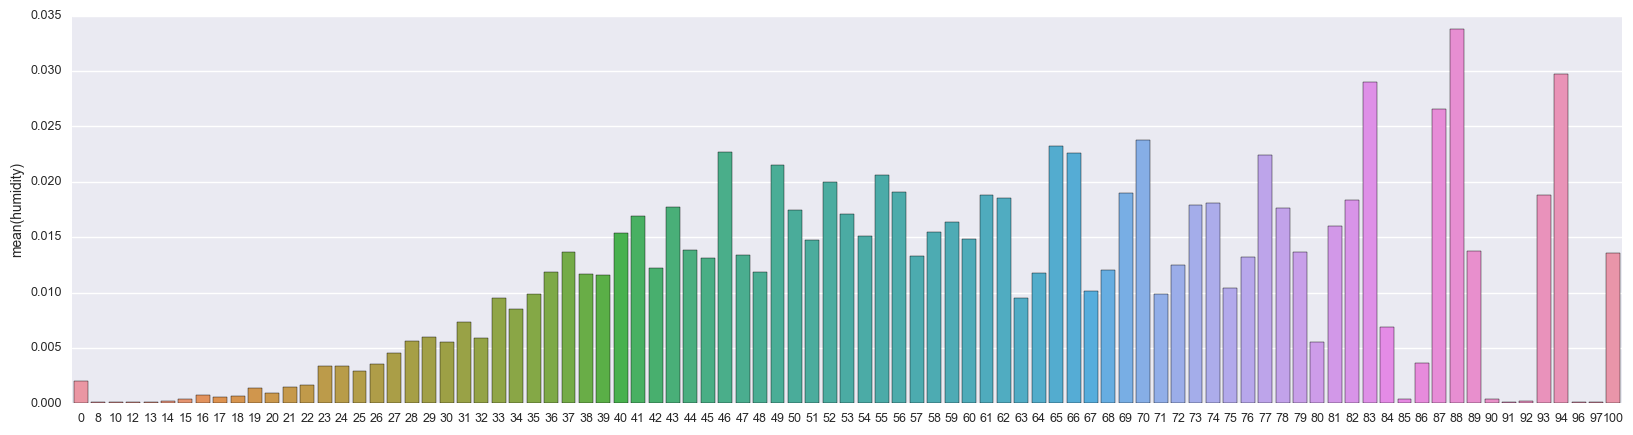

In [9]:
plt.figure(figsize=(20, 5))
sns.set(font_scale = 0.9)
sns.barplot(x = d['humidity'].value_counts().index, y = d['humidity'].sort_values(ascending = True).value_counts(normalize = True));

Rider counts are relatively evenly distributed between 40 and 79 with some interesting outliers occurring in the high 80's and low 90's, this would suggest an association with higher temps and ridership.

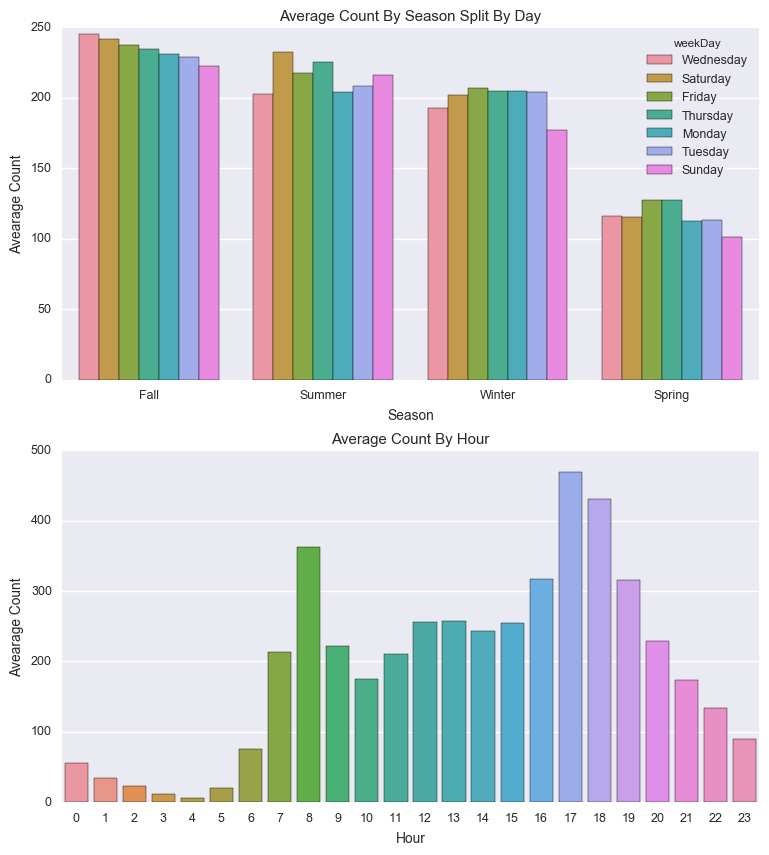

In [10]:
# demand for bicycle across working day or non-working/non-holiday

fig,(ax1,ax2) = plt.subplots(nrows = 2)
fig.set_size_inches(9, 10)

daySeasonAgg = pd.DataFrame(d.groupby(["season", "weekDay"], sort = True)["count"].mean()).reset_index().sort_values(by = ["count"], ascending = False)
sns.barplot(data = daySeasonAgg, x = "season", y = "count", hue = "weekDay", ax = ax1)
ax1.set(xlabel = 'Season', ylabel = 'Avearage Count', title = "Average Count By Season Split By Day");

hourAgg = pd.DataFrame(data.groupby("hour")["count"].mean()).reset_index().sort_values(by = "count", ascending = False)
sns.barplot(data = hourAgg, x = "hour", y = "count", ax = ax2)
ax2.set(xlabel = 'Hour', ylabel = 'Avearage Count', title = "Average Count By Hour");



Fall has the highest mean average rental counts for all seven days of the week compared to spring, summer, and winter.

Not surprisingly, there's a surge during 08 hour morning commute and again during the 17 and 18 hours evening commute.

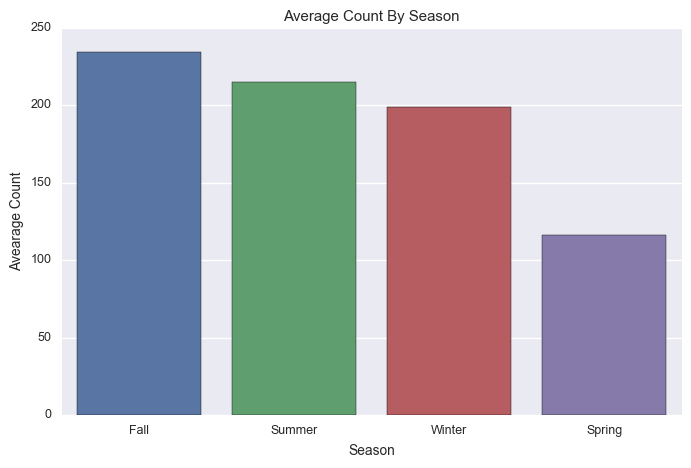

In [11]:
fig,(ax1)= plt.subplots(nrows = 1)
fig.set_size_inches(8, 5)

monthAggregated = pd.DataFrame(d.groupby("season")["count"].mean()).reset_index().sort_values(by = "count", ascending = False)
sns.barplot(data = monthAggregated, x = "season", y = "count", ax = ax1)
ax1.set(xlabel = 'Season', ylabel = 'Avearage Count', title = "Average Count By Season");

Not surprisingly given our week day by season chart, Fall has the higher mean relative to summer, winiter, and spring.

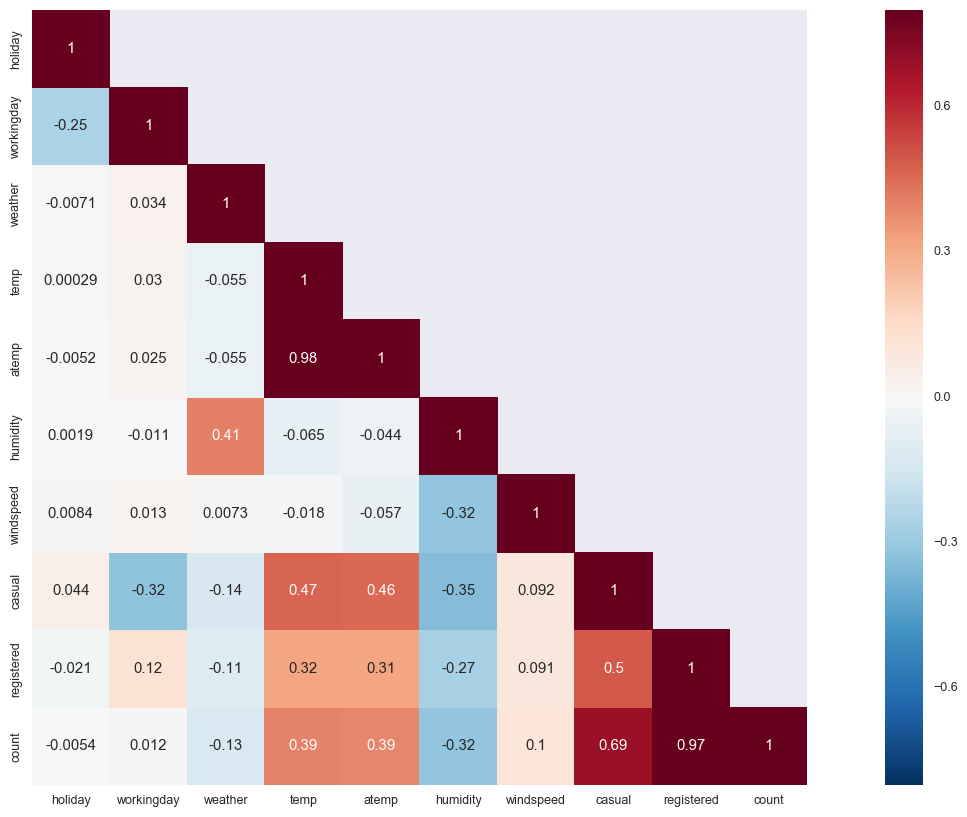

In [12]:
cm = d.corr()
mask = np.array(cm)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cm, mask=mask,vmax=.8, square=True,annot=True);

We see an interesting relationship between 'casual' and 'temp', potentially aligning with our hypothesis that there's a strong relationship between the two factors. Similarly, although to a lesser degree, we see somewhat of a positive association between 'registered' and 'temp' as well as 'count' and 'temp'. 

Surprisingly, there appears to be a week association between 'windspeed' and 'count'.

Not surprisingly, there's a positive association between 'humidity' and 'weather'

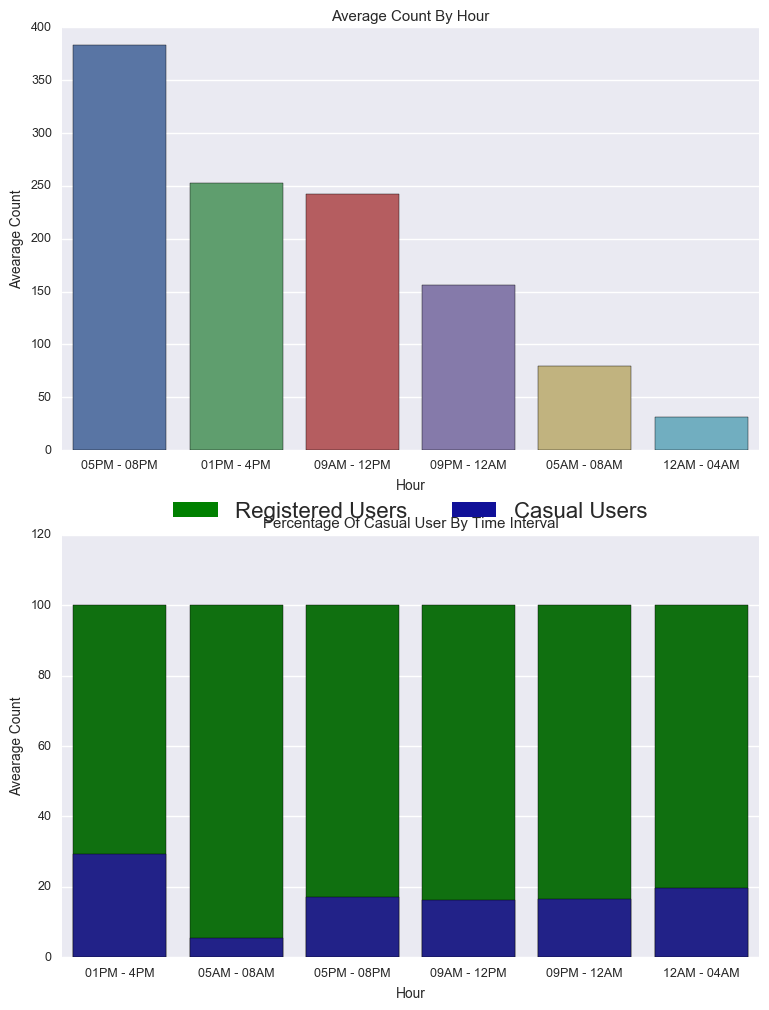

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows = 2)
fig.set_size_inches(9, 12)

# classifying hours

dailyDataModified = d.replace({'hour' : { "00" : "12AM - 04AM", "01" : "12AM - 04AM", "02" : "12AM - 04AM" ,"03":"12AM - 04AM",
                                  "04":"05AM - 08AM","05":"05AM - 08AM","06":"05AM - 08AM","07":"05AM - 08AM",
                                  "08":"09AM - 12PM","09":"09AM - 12PM","10":"09AM - 12PM","11":"09AM - 12PM",
                                  "12":"01PM - 4PM","13":"01PM - 4PM","14":"01PM - 4PM","15":"01PM - 4PM",
                                  "16":"05PM - 08PM","17":"05PM - 08PM","18":"05PM - 08PM","19":"05PM - 08PM",
                                  "20":"09PM - 12AM","21":"09PM - 12AM","22":"09PM - 12AM","23":"09PM - 12AM"}})
dailyDataMean = pd.DataFrame(dailyDataModified.groupby("hour")["count"].mean()).reset_index().sort_values(by="count",ascending = False)
sns.barplot(data = dailyDataMean,x = "hour",y = "count",ax = ax1)
ax1.set(xlabel = 'Hour', ylabel = 'Avearage Count',title = "Average Count By Hour")


bike_week = pd.DataFrame.groupby(dailyDataModified, by = "hour", as_index = False)['casual', 'registered'].mean()
bike_week['casual_prct'] = bike_week.casual*100/(bike_week.casual + bike_week.registered)
bike_week['registered_prct'] = bike_week.registered*100/(bike_week.casual + bike_week.registered)
bike_week['total_prct'] = bike_week.casual_prct + bike_week.registered_prct
sns.set_context({"figure.figsize": (12, 4)})
sns.barplot(x = "hour", y = "total_prct", data = bike_week, color = "#008000")
sns.barplot(x = "hour", y = "casual_prct", data = bike_week, color = "#111199")
ax2.set(xlabel='Hour', ylabel='Avearage Count',title="Percentage Of Casual User By Time Interval")
green = plt.Rectangle((0,0),1,1,fc="#008000", edgecolor = 'none')
blue = plt.Rectangle((0,0),1,1,fc='#111199',  edgecolor = 'none')
legend = plt.legend([green, blue], ['Registered Users', 'Casual Users'], loc=9, ncol = 2, 
                  fancybox=True, shadow=True, prop={'size':16}, borderpad=-2)
legend.draw_frame(False)

Not surprisingly, we see the highest share of registered users during the 05AM - 08AM morning commute window. Also not surprising, the highest share of non-registered ridership happened during the 01PM - 4PM window which makes sense given tourism behaviors.

# Modeling

In [14]:
# define function for evaluation metric root mean logarithmic error
# RMSLE penalizes an under-predicted estimate greater than an over-predicted estimate

def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [15]:
data.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0


In [16]:
train_data = data.iloc[:-1000, :]
test_data = data.iloc[-1000:, :]
print(data.shape, train_data.shape, test_data.shape)

((10886, 14), (9886, 14), (1000, 14))


In [17]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4


In [18]:
train_labels = train_data['count'].values
train_data = train_data.drop(['datetime', 'count', 'casual', 'registered'], axis = 1)
test_labels = test_data['count'].values
test_data = test_data.drop(['datetime', 'count', 'casual', 'registered'], axis = 1)

In [19]:
numeric_data_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'hour']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in train_data.columns], dtype = bool)

binary_data_columns = ['holiday', 'workingday']
binary_data_indices = np.array([(column in binary_data_columns) for column in train_data.columns], dtype = bool)

categorical_data_columns = ['season', 'weather', 'month'] 
categorical_data_indices = np.array([(column in categorical_data_columns) for column in train_data.columns], dtype = bool)

transformer_list = [        
            #binary
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0))            
                        ])),
        
            #categorical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))            
                        ])),
        ]

Linear model approach

In [22]:
# SGDRegressor

regressor = linear_model.Lasso(max_iter = 2000)

estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('model_fitting', regressor)
    ]
)

estimator.fit(train_data, train_labels)
predicted = estimator.predict(test_data)

print "RMSLE: ", rmsle(test_labels, predicted)
print "MAE: ",  metrics.mean_absolute_error(test_labels, predicted)

RMSLE:  1.09377144703
MAE:  122.269015282


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in log


In [23]:
# SGDRegressor

regressor = linear_model.Ridge(max_iter = 2000)

estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('model_fitting', regressor)
    ]
)

estimator.fit(train_data, train_labels)
predicted = estimator.predict(test_data)

print "RMSLE: ", rmsle(test_labels, predicted)
print "MAE: ",  metrics.mean_absolute_error(test_labels, predicted)

RMSLE:  1.08904734519
MAE:  121.401412092


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in log


In [93]:
# cross validation

parameters_grid = {
    'model_fitting__alpha' : [0.1, 1, 2, 3, 4, 10, 30]
}

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_cv = grid_search.GridSearchCV(estimator, parameters_grid, scoring = rmsle_scorer, cv = 4)
grid_cv.fit(train_data, train_labels)

predicted = grid_cv.best_estimator_.predict(test_data)

print "RMSLE: ", rmsle(test_labels, predicted)
print "Best params: ", grid_cv.best_params_

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in log


RMSLE:  1.05343688212
Best params:  {'model_fitting__alpha': 10}


Random forest approach

In [94]:
regressor = RandomForestRegressor(random_state = 0, max_depth = 20, n_estimators = 150)
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = transformer_list)),
    ('model_fitting', regressor)
    ]
)
estimator.fit(train_data, train_labels)
#metrics.mean_absolute_error(test_labels, estimator.predict(test_data))
print "RMSLE: ", rmsle(test_labels, estimator.predict(test_data))

RMSLE:  0.483956831935


In conclusion, random forest acheived the lowest RMSLE with 0.4839 followed by ridge regression at 1.0890 and lastly lasso regression at 1.0937. Using RMSLE as the evaluation metric random forest is the top performer, by a long shot. This output performs in the middle of the pack amongst the 12k+ submissions in kaggle. Additional feature engineering could be done to enhance the outcome in future work.

In [95]:
# estimator.get_params().keys()

In [96]:
# parameters_grid = {
#    'model_fitting__n_estimators' : [70, 100, 130],
#    'model_fitting__max_features' : [3, 4, 5, 6],
# }

# grid_cv = grid_search.GridSearchCV(estimator, parameters_grid, scoring = 'neg_mean_absolute_error', cv = 3)
# grid_cv.fit(train_data, train_labels)

# print(-grid_cv.best_score_)
# print(grid_cv.best_params_)

89.4020921344
{'model_fitting__max_features': 6, 'model_fitting__n_estimators': 130}


# Visualizing linear and random forest models

Populating the interactive namespace from numpy and matplotlib


C:\Program Files\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab', 'datetime', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


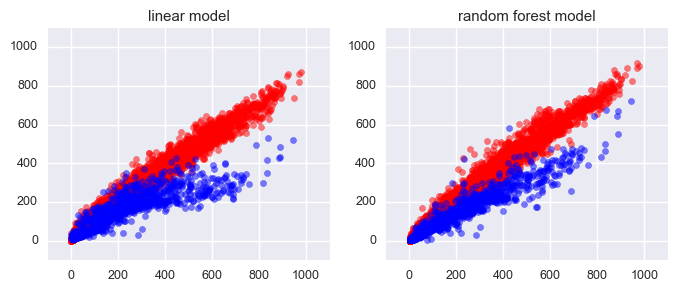

In [190]:
%pylab inline
pylab.figure(figsize=(8, 3))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)
pylab.scatter(train_labels, grid_cv.best_estimator_.predict(train_data), alpha=0.5, color = 'red')
pylab.scatter(test_labels, grid_cv.best_estimator_.predict(test_data), alpha=0.5, color = 'blue')
pylab.title('linear model')

pylab.subplot(1,2,2)
pylab.grid(True)
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)
pylab.scatter(train_labels, estimator.predict(train_data), alpha=0.5, color = 'red')
pylab.scatter(test_labels, estimator.predict(test_data), alpha=0.5, color = 'blue')
pylab.title('random forest model')